# Poisson Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,3.95,3.95,3.98,3.84,3.85,20548400
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.tail()

,Adj Close,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-08-20,19.980000,19.980000,20.08,19.350000,19.790001,62983200,0,1,1,0.010622
2018-08-21,20.400000,20.400000,20.42,19.860001,19.980000,55629000,1,1,1,0.021021
2018-08-22,20.900000,20.900000,20.92,20.209999,20.280001,62002700,1,1,1,0.024510
2018-08-23,22.290001,22.290001,22.32,21.139999,21.190001,113444100,1,1,1,0.066507
2018-08-24,23.980000,23.980000,24.00,22.670000,22.910000,164328200,0,0,0,0.075819


In [5]:
X = dataset.iloc[ : , 6:8].values
y = dataset.iloc[ : , 8].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(936, 2)
(936,)
(234, 2)
(234,)


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial

In [9]:
m1 = poisson('Increase_Decrease ~ Returns', data =dataset).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.812951
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:      Increase_Decrease   No. Observations:                 1170
Model:                        Poisson   Df Residuals:                     1168
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 May 2020   Pseudo R-squ.:               0.0001306
Time:                        22:05:47   Log-Likelihood:                -951.15
converged:                       True   LL-Null:                       -951.28
                                        LLR p-value:                    0.6181
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7896      0.043    -18.156      0.000      -0.875      -0.704
Returns        0.5577      1.

In [10]:
model_fit1 = dataset
preds_1 = m1.predict()
model_fit1['preds'] = preds_1

print(model_fit1.head(5))

            Adj Close  Close  High   Low  Open    Volume  Increase_Decrease  \
Date                                                                          
2014-01-03       4.00   4.00  4.00  3.88  3.98  22887200                  1   
2014-01-06       4.13   4.13  4.18  3.99  4.01  42398300                  1   
2014-01-07       4.18   4.18  4.25  4.11  4.19  42932100                  0   
2014-01-08       4.18   4.18  4.26  4.14  4.23  30678700                  0   
2014-01-09       4.09   4.09  4.23  4.05  4.20  30667600                  0   

            Buy_Sell_on_Open  Buy_Sell   Returns     preds  
Date                                                        
2014-01-03                 1         1  0.012658  0.457245  
2014-01-06                 1         1  0.032500  0.462334  
2014-01-07                 1         0  0.012106  0.457105  
2014-01-08                 0         0  0.000000  0.454029  
2014-01-09                 0         1 -0.021531  0.448609  


In [11]:
columns = ['Adj Close', 'High', 'Low', 'Open']
X = [s for s in dataset[columns].values]
X = sm.add_constant(X, prepend = False)
Y = [s for s in dataset['Returns'].values]

In [12]:
m2 = sm.Poisson(Y, X).fit()
print(m2.summary())

         Current function value: 6812363.638260
         Iterations: 35
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                 1170
Model:                        Poisson   Df Residuals:                     1165
Method:                           MLE   Df Model:                            4
Date:                Sat, 23 May 2020   Pseudo R-squ.:              -4.317e+08
Time:                        22:05:47   Log-Likelihood:            -7.9705e+09
converged:                      False   LL-Null:                       -18.462
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            46.6108      0.018   2624.528      0.000      46.576      46.646
x2             7.1890      0.013    540.065      0.000     

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


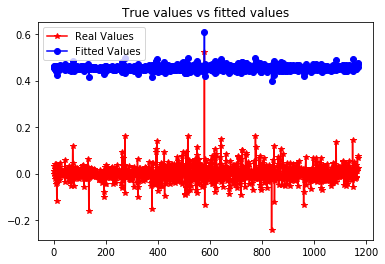

In [13]:
preds = m1.predict()
plt.plot(range(len(Y)), Y, 'r*-', range(len(Y)), preds, 'bo-')
plt.title('True values vs fitted values')
plt.legend(['Real Values', 'Fitted Values'])
plt.show()